In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Coding Samurai/Task1/dataset.csv', encoding='ISO-8859-1')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


# **Exploratory Data Analysis (EDA)**

**Visualizing Monthly Trends**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Adding Month and Year columns

#Converting date's data type
df['Order Date']=pd.to_datetime(df['Order Date'])

#Add month column
df['Month']=df['Order Date'].dt.month

#Add year column
df['Year']=df['Order Date'].dt.year

df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Month,Year
0,1,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,11,2016
1,2,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,11,2016
2,3,CA-2016-138688,2016-06-12,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,6,2016
3,4,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,10,2015
4,5,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,10,2015


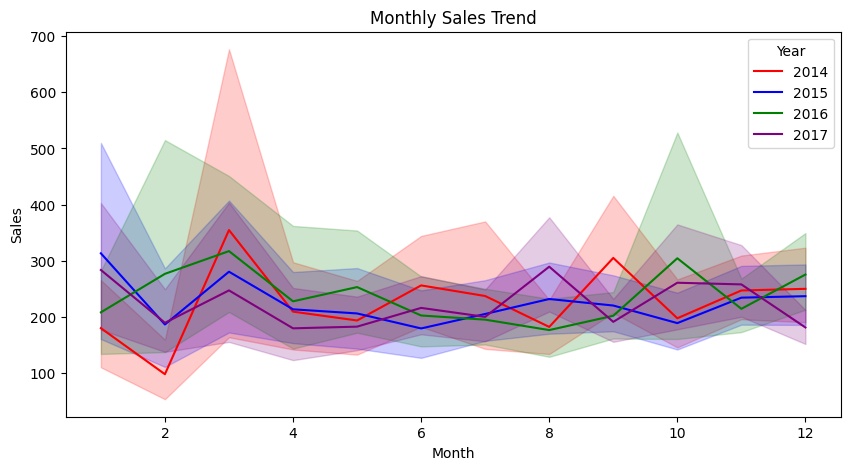

In [ ]:
monthly_sales=pd.DataFrame(df.groupby(['Month','Year'])['Sales'].sum())
plt.figure(figsize=(10,5))
#plot multiple time series
# sns.lineplot(x='date', y='sales', hue='company', data=df)
sns.lineplot(x=df['Month'],y=df['Sales'],hue=df['Year'],palette=['red','blue','green','purple'])
plt.title('Monthly Sales Trend')
plt.show()
# monthly_sales

**Product Analysis**

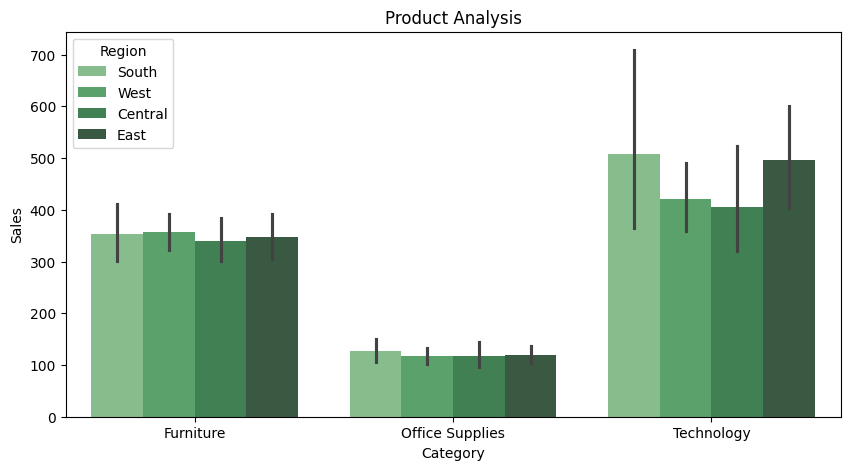

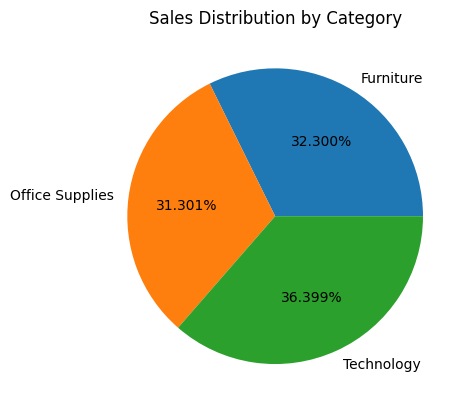

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x=df['Category'],y=df['Sales'],hue=df['Region'],palette="Greens_d")
plt.title('Product Analysis')
plt.show()
# Instead of analyzing which region performs better in sales. We should consider analyzing which category in each region performs better to have an in-depth idea for production.

category_sales = df.groupby('Category')['Sales'].sum()
plt.pie(category_sales, labels=category_sales.index, autopct='%3.3f%%')
plt.title('Sales Distribution by Category')
plt.show()
#The piechart would depict which category has overall better sales performance.

**Product Performance Analysis**

(9994,)


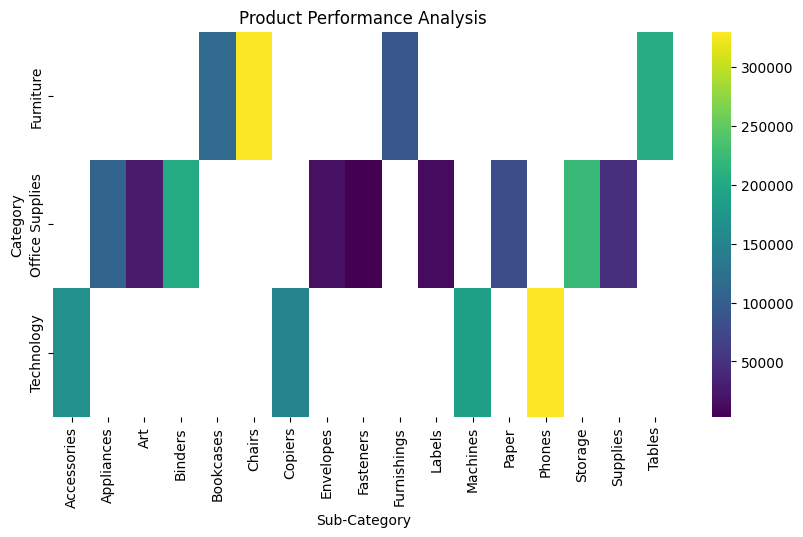

In [ ]:
print(df["Product Name"].shape)
# Here, we can't display products in bar plot or piechart as there are a lot of products (almost 10k). Best way can be to represent them in a heatmap.

# df['Sub-Category'].unique()
# Here, we have 2 features - Category, Sub Category and Sales (Scale) so we need to create a pivot table for the same.

# The pivot table will show the total sales for each sub-category within each category.
product_performance=df.pivot_table(index='Category',columns='Sub-Category',values='Sales',aggfunc='sum')
plt.figure(figsize=(10,5))
sns.heatmap(product_performance,cmap='viridis')
plt.title("Product Performance Analysis")
plt.show()


**Customer Analysis**

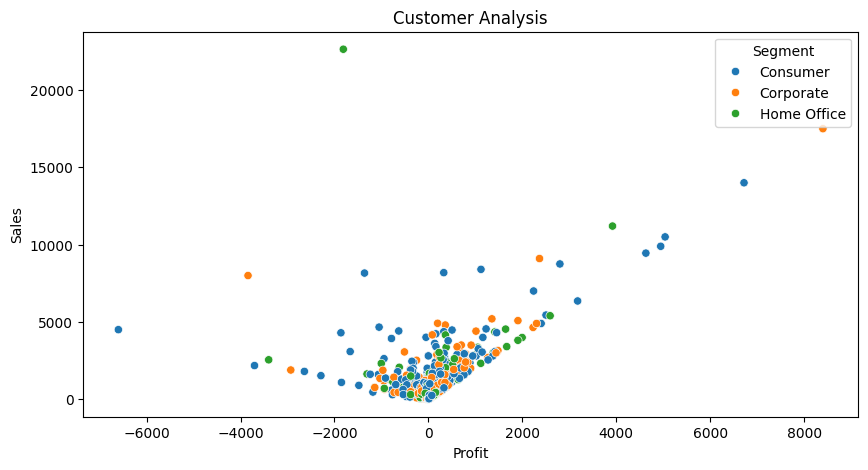

In [ ]:
# For customer analysis, now that we have compared all the features. The only feature left to analyze is profits earned.

# df.columns,df['Segment'].unique()
# Analyzing profits against sales for every kind of customer segment will help us analyze contribution of all types of customer.
# The best way to identify customer trends is scatter plot.
plt.figure(figsize=(10,5))
sns.scatterplot(x=df['Profit'],y=df['Sales'],hue=df['Segment'])
plt.title('Customer Analysis')
plt.show()

In [ ]:
df.columns,df['Product Name'].unique().shape

(Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
        'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
        'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
        'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit', 'Month',
        'Year'],
       dtype='object'),
 (1850,))

In [ ]:
pivot = df.pivot_table(index=['Product Name'],
                       values=['Sales'],
                       aggfunc='sum')
pivot.shape,pivot.sort_values(by=['Sales'],ascending=False,inplace=True)
data=pivot.head()
# product=list(data.index)
data['Product']=data.index
data

<ipython-input-13-a29f1d938a11>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Product']=data.index


,Sales,Product
Product Name,,
Canon imageCLASS 2200 Advanced Copier,61599.824,Canon imageCLASS 2200 Advanced Copier
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind,27453.384,Fellowes PB500 Electric Punch Plastic Comb Bin...
Cisco TelePresence System EX90 Videoconferencing Unit,22638.480,Cisco TelePresence System EX90 Videoconferenci...
HON 5400 Series Task Chairs for Big and Tall,21870.576,HON 5400 Series Task Chairs for Big and Tall
GBC DocuBind TL300 Electric Binding System,19823.479,GBC DocuBind TL300 Electric Binding System


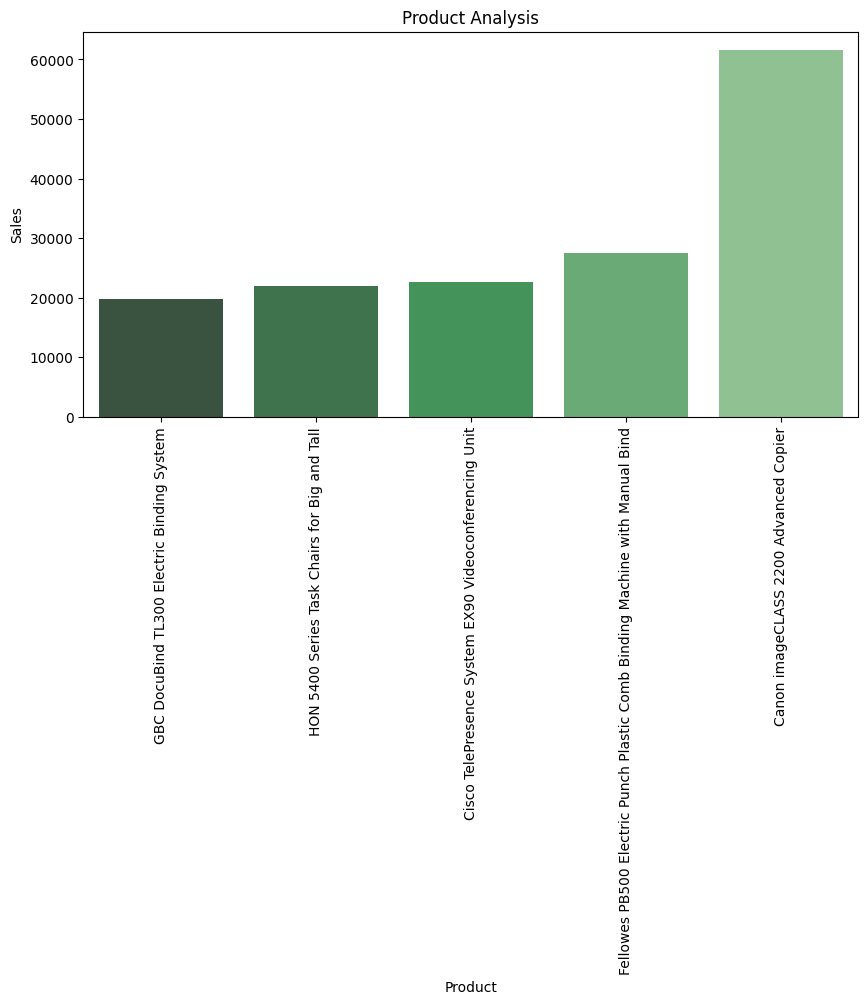

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x='Product',
            y="Sales", data=data,
            order=data.sort_values('Sales').Product,hue='Product',palette="Greens_d")
plt.xticks(rotation=90)
# sns.barplot(x=product,y=data['Sales'], order=data.sort_values(data['Sales']).product,hue=product,palette="Greens_d")
plt.title('Product Analysis')
plt.show()

In [ ]:
pivot = df.pivot_table(index=['Product Name'],
                       values=['Sales','Profit'],
                       aggfunc='sum')
pivot['Percentage']=pivot['Profit']*100.0/pivot['Sales']
# pivot
pivot.shape,pivot.sort_values(by=['Percentage','Profit','Sales'],ascending=False,inplace=True)
data=pivot.head()
product=list(data.index)
data['Product']=data.index
data

<ipython-input-15-94c2ea34d70c>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Product']=data.index


,Profit,Sales,Percentage,Product
Product Name,,,,
Canon imageCLASS MF7460 Monochrome Digital Laser Multifunction Copier,1995.99,3991.98,50.0,Canon imageCLASS MF7460 Monochrome Digital Las...
Tops Green Bar Computer Printout Paper,171.29,342.58,50.0,Tops Green Bar Computer Printout Paper
Avery 475,133.20,266.40,50.0,Avery 475
Xerox 1890,122.35,244.70,50.0,Xerox 1890
"Adams Telephone Message Book w/Frequently-Called Numbers Space, 400 Messages per Book",111.72,223.44,50.0,Adams Telephone Message Book w/Frequently-Call...


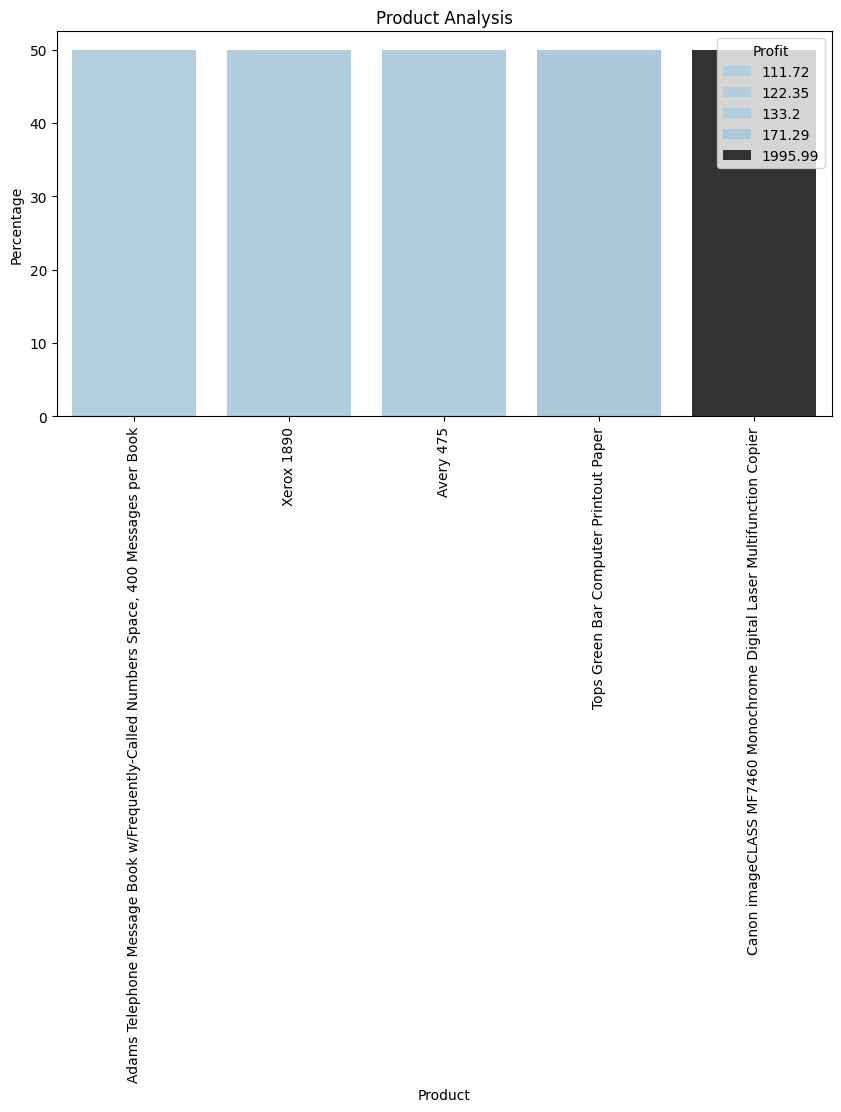

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x='Product',
            y="Percentage", data=data,
            order=data.sort_values(['Percentage','Sales','Profit']).Product,hue='Profit',palette="Blues_d")
plt.xticks(rotation=90)
# sns.barplot(x=product,y=data['Sales'], order=data.sort_values(data['Sales']).product,hue=product,palette="Greens_d")
plt.title('Product Analysis')
plt.show()

**CUSTOMER ANALYSIS**

In [ ]:
pivot=df.pivot_table(index=['Customer Name'],values=['Sales'],aggfunc='sum')
data=pivot.head()
data['Customer']=data.index
data.sort_values(by=['Sales'],ascending=False)

<ipython-input-17-7000be20b7b3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Customer']=data.index


,Sales,Customer
Customer Name,,
Adam Bellavance,7755.620,Adam Bellavance
Adam Hart,3250.337,Adam Hart
Aaron Smayling,3050.692,Aaron Smayling
Aaron Hawkins,1744.700,Aaron Hawkins
Aaron Bergman,886.156,Aaron Bergman


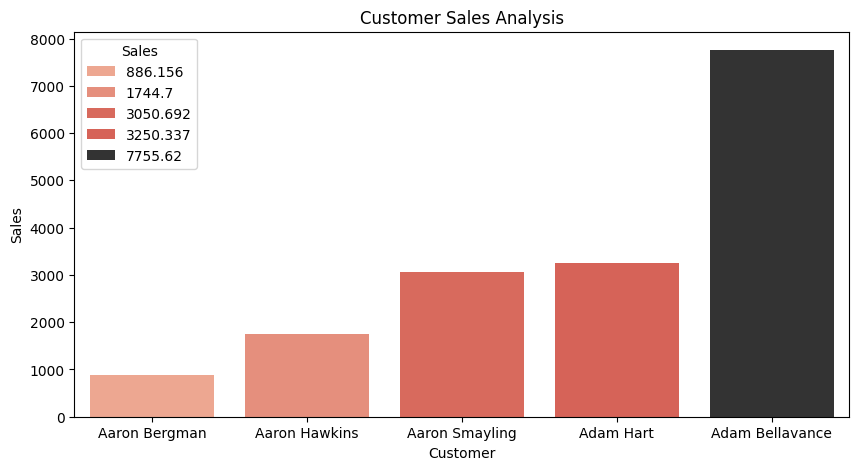

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x='Customer',y='Sales',data=data,order=data.sort_values('Sales').Customer,hue='Sales',palette='Reds_d')
plt.title('Customer Sales Analysis')
plt.show()

In [ ]:
df['Order Date'].min(),df['Order Date'].max()

(Timestamp('2014-01-03 00:00:00'), Timestamp('2017-12-30 00:00:00'))